In [7]:
!pip install pandas numpy matplotlib seaborn wordcloud scikit-learn nltk


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df = pd.read_csv("Resume.csv")
df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [13]:
print(df.info())
print("\nCategory Counts:\n", df['Category'].value_counts())

# Remove duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None

Category Counts:
 Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                 

In [17]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)   # remove non-letters
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['CleanedText'] = df['Resume_str'].apply(clean_text)
df.head()


,ID,Resume_str,Resume_html,Category,CleanedText
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary years experience recruitin...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...


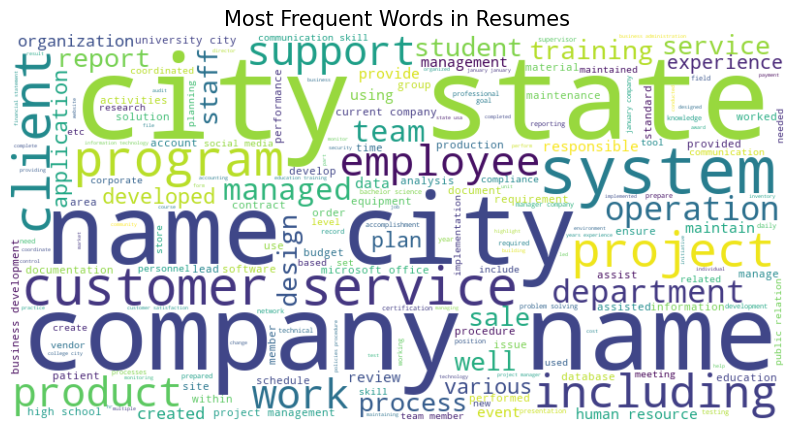

In [18]:
text = " ".join(df['CleanedText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Resumes", fontsize=15)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13424\3407931110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


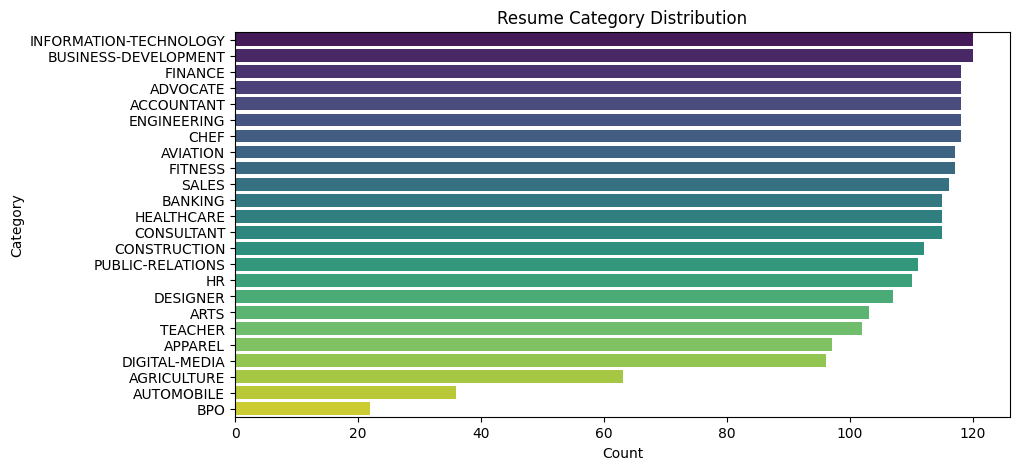

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


In [20]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['CleanedText']).toarray()
y = df['Category']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.6498993963782697

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.84      0.90      0.87        29
              ADVOCATE       0.54      0.63      0.58        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.50      0.40      0.44        20
                  ARTS       0.12      0.11      0.11        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.73      0.70      0.71        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.83      0.56      0.67        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.90      0.79      0.84        34
            CONSULTANT       0.60      0.30      0.40        20
              DESIGNER       0.75      0.79      

D:\MINICONDA\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\MINICONDA\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\MINICONDA\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


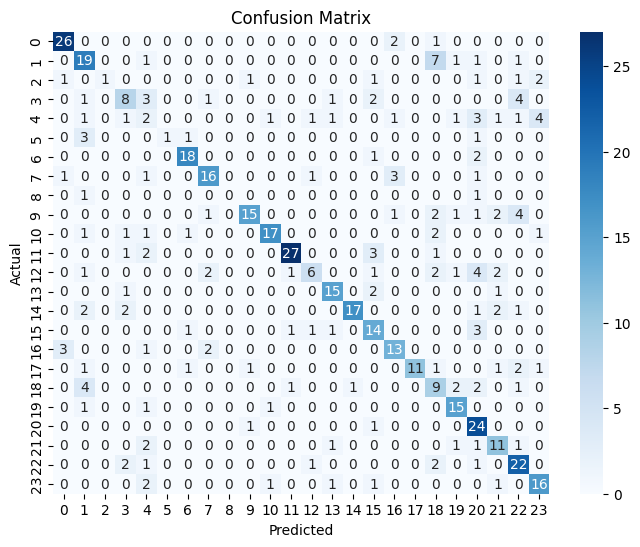

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
sample_text = """Experienced software engineer with expertise in machine learning, data analysis, and Python."""
sample_text_cleaned = clean_text(sample_text)
sample_features = vectorizer.transform([sample_text_cleaned])
print("Predicted Category:", model.predict(sample_features)[0])


Predicted Category: ENGINEERING
